<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Manipulação;</li>
  <li>Visualização;</li>
  <li>Storytelling.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para **você continuar** a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Escreva uma breve descrição do problema. **Esta análise explora dados logísticos para entender variáveis como datas de entrega, localização, veículos utilizados e desempenho dos motoristas. O objetivo é otimizar rotas, identificar gargalos operacionais e melhorar a eficiência geral. Analisaremos o tempo de trânsito, distâncias percorridas, volume de carga e relação com custos. Utilizaremos cinco etapas principais: exploração inicial dos dados, tratamento de valores faltantes, manipulação para criação de novas variáveis e insights, visualização de padrões e correlações, e uma análise final para conclusões aplicáveis em operações logísticas.**

## 2\. Pacotes e bibliotecas

In [ ]:
# importe todas as suas bibliotecas aqui, siga os padrões do PEP8:
#
# - 1º pacotes nativos do python: json, os, etc.;
# - 2º pacotes de terceiros: pandas, seabornm etc.;
# - 3º pacotes que você desenvolveu.
#

# Pacotes nativos do Python
import json
import os

# Pacotes de terceiros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes que você desenvolveu (caso tenha algum)
# from my_module import my_function

## 3\. Exploração de dados

In [ ]:
import os
import pandas as pd

# Caminho para o arquivo no Google Drive
data_path = 'https://drive.google.com/uc?id=1r8IhgxNV96sGXIq9HEuWv1K4j7QX8M49'

# Carregar os dados ignorando as primeiras linhas como cabeçalhos
df = pd.read_csv(data_path, delimiter=',', names=["Nome da cidade", "Estado", "População", "Densidade populacional", "PIB per capita", "IDH"], skiprows=1, low_memory=False)

# Converter colunas numéricas para seus tipos apropriados
df['População'] = df['População'].astype(int)
df['Densidade populacional'] = df['Densidade populacional'].astype(int)
df['PIB per capita'] = df['PIB per capita'].astype(float)
df['IDH'] = df['IDH'].astype(float)

# Verificar os primeiros registros do DataFrame
print("Primeiros registros do DataFrame:")
print(df.head())

# Informações sobre o DataFrame
print("\nInformações sobre o DataFrame:")
print(df.info())

# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(df.describe(include='all'))

# Verificar tipos de dados das colunas
print("\nTipos de dados das colunas:")
print(df.dtypes)

# Verificar valores ausentes por coluna
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Remover as colunas temporariamente para calcular a correlação
df_without_city_name_and_state = df.drop(columns=['Nome da cidade', 'Estado'])

# Verificar correlação entre as variáveis
print("\nCorrelação entre as variáveis:")
correlation_matrix = df_without_city_name_and_state.corr()
print(correlation_matrix)

# Salvar como CSV
output_dir = '/content/drive/MyDrive/Exercicio3'
os.makedirs(output_dir, exist_ok=True)
file_path = os.path.join(output_dir, 'cidades-limpo.csv')
df.to_csv(file_path, index=False)

print(f"CSV criado e salvo em {file_path}")


Primeiros registros do DataFrame:
  Nome da cidade Estado  População  Densidade populacional  PIB per capita  \
0      CIDADE_45     MG     383526                    1736        22662.83   
1      CIDADE_48     PR     423758                    1488         3685.29   
2      CIDADE_65     AM     228877                    1731         7306.06   
3      CIDADE_68     BA     725525                     760        22728.38   
4      CIDADE_68     SP     183847                    1017        22219.12   

     IDH  
0  0.778  
1  0.580  
2  0.572  
3  0.825  
4  0.770  

Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Nome da cidade          100 non-null    object 
 1   Estado                  100 non-null    object 
 2   População               100 non-null    int64  
 3   Densidade populacional  10

## 4\. Manipulação

In [ ]:
import pandas as pd
import numpy as np

# Carregar o DataFrame pré-processado
df = pd.read_csv('/content/drive/MyDrive/Exercicio3/cidades-limpo.csv')

# Enriquecimento dos Dados
# - Calculando População por km²
df['População por km²'] = df['População'] / df['Densidade populacional']

# - Calculando PIB Total
df['PIB Total'] = df['População'] * df['PIB per capita']

# - Adicionando uma nova coluna para classificar as cidades por IDH
def classify_idh(idh):
    if idh > 0.9:
        return 'Muito Alto'
    elif idh > 0.8:
        return 'Alto'
    elif idh > 0.7:
        return 'Médio'
    else:
        return 'Baixo'

df['Classificação IDH'] = df['IDH'].apply(classify_idh)

# Controle de Qualidade
# - Remover duplicatas
df.drop_duplicates(inplace=True)

# - Verificar e tratar valores ausentes
# Aqui, vamos converter as colunas categóricas para tipo 'category'
df['Nome da cidade'] = df['Nome da cidade'].astype('category')
df['Estado'] = df['Estado'].astype('category')
df['Classificação IDH'] = df['Classificação IDH'].astype('category')

# Preencher valores ausentes com a média ou moda (dependendo do caso)
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# - Verificar a integridade dos dados
print(df.isnull().sum())

# Salvar o DataFrame manipulado
file_path = '/content/drive/MyDrive/Exercicio3/cidades-manipulado.csv'
df.to_csv(file_path, index=False)

print(f"CSV criado e salvo em {file_path}")


Nome da cidade            0
Estado                    0
População                 0
Densidade populacional    0
PIB per capita            0
IDH                       0
População por km²         0
PIB Total                 0
Classificação IDH         0
dtype: int64
CSV criado e salvo em /content/drive/MyDrive/Exercicio3/cidades-manipulado.csv


<ipython-input-19-b7fe0be4438c>:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


## 5\. Visualização

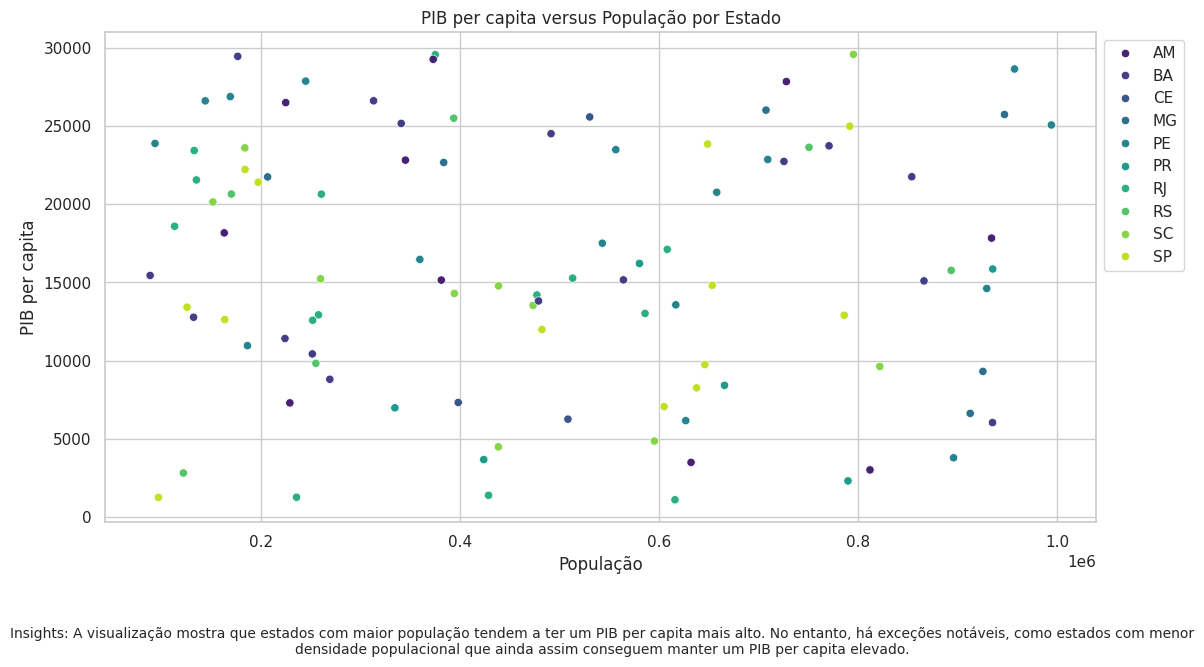

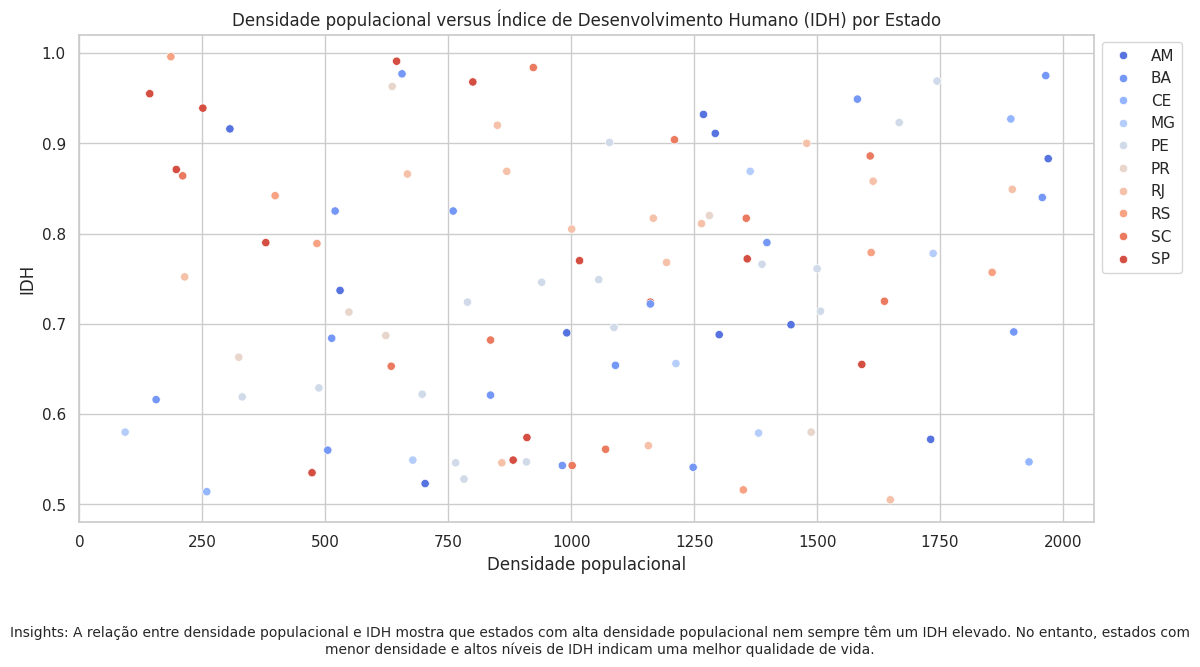

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações do seaborn para melhorar a aparência dos gráficos
sns.set(style="whitegrid")

# 1. Visualização: PIB per capita vs População
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='População', y='PIB per capita', hue='Estado', palette='viridis')
plt.title('PIB per capita versus População por Estado')
plt.xlabel('População')
plt.ylabel('PIB per capita')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Adicionar um pequeno texto com insights
plt.figtext(0.5, -0.1,
            "Insights: A visualização mostra que estados com maior população tendem a ter um PIB per capita mais alto. "
            "No entanto, há exceções notáveis, como estados com menor densidade populacional que ainda assim conseguem manter um PIB per capita elevado.",
            ha='center', fontsize=10, wrap=True)

# 2. Visualização: Densidade populacional vs IDH
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Densidade populacional', y='IDH', hue='Estado', palette='coolwarm')
plt.title('Densidade populacional versus Índice de Desenvolvimento Humano (IDH) por Estado')
plt.xlabel('Densidade populacional')
plt.ylabel('IDH')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()

# Adicionar um pequeno texto com insights
plt.figtext(0.5, -0.1,
            "Insights: A relação entre densidade populacional e IDH mostra que estados com alta densidade populacional nem sempre têm um IDH elevado. "
            "No entanto, estados com menor densidade e altos níveis de IDH indicam uma melhor qualidade de vida.",
            ha='center', fontsize=10, wrap=True)

# Mostrar os gráficos
plt.show()
